In [ ]:
%matplotlib inline
!pip install igraph

import igraph as ig
import matplotlib.pyplot as plt

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3.3/3.3 MB 21.4 MB/s eta 0:00:00


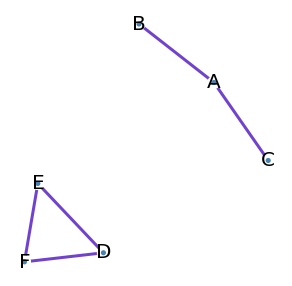

In [ ]:
# A LAYER

vertices = 6
edges = [(0,1),(0,2),(3,4),(3,5),(4,5)]
g = ig.Graph(vertices, edges)
g.spanning_tree()


g.vs["name"] = ["A", "B", "C", "D", "E", "F"]
g.es["type"] = [True, True, True, True, True]

g.add_edge(3,1)
g.es[len(edges)]["type"] = True
g.es[3]["type"] = True

g.delete_edges(len(edges))

fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax,
    vertex_size=0.1,
    vertex_color=["steelblue"],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=20.0,
    edge_width=[3 if type else 0.5 for type in g.es["type"]],
    edge_color=["#7142cf"]
)

g.subcomponent()

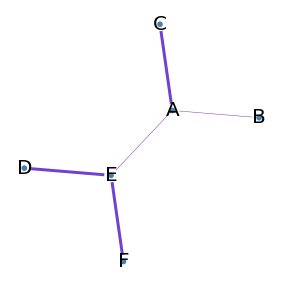

In [ ]:
# B LAYER

vertices = 6
edges = [(0,4),(0,2),(4,5),(3,4)]
g = ig.Graph(vertices, edges)


g.vs["name"] = ["A", "B", "C", "D", "E", "F"]
g.es["type"] = [False, True, True, True, True]

g.add_edge(0,1)
g.es[len(edges)]["type"] = None

fig, ax = plt.subplots(figsize=(5,5))
ig.plot(
    g,
    target=ax,
    vertex_size=0.1,
    vertex_color=["steelblue"],
    vertex_frame_width=4.0,
    vertex_frame_color="white",
    vertex_label=g.vs["name"],
    vertex_label_size=20.0,
    edge_width=[3 if type else 5 if None else 0.5 for type in g.es["type"]],
    edge_color=["#7142cf"]
)

In [ ]:
# ESQUELETO ALGORITMO

#Primero, se saca un spanning tree del grafo que se nos entrega

st = g.spanning_tree()

#Luego, se agregan links ad hoc según corresponda entre componentes desconectados


# Se elige un link random del set de ad hoc links y se remueve
